# Теория

## Прорывы

### Марковские цепи

Цепь маркова - последовательность событий и переходов между ними; вероятность наступления события зависит только от предыдущего состояния  
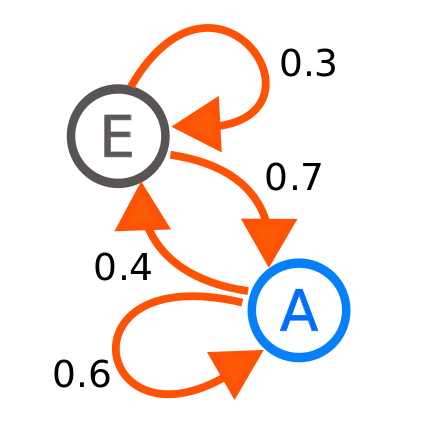

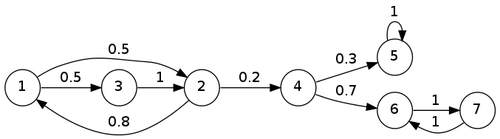

In [ ]:
#    e1   e2   e3
# e1 .2   0   .8
# e2 .3  .1   .6
# e3 .5  .5   .0

In [ ]:
# A a a a
# a a a a a
# a a a a a
#     a a a

# a A a a
# a a a a a
# a a a a a
#     a a a

### Искусственные нейроны

Модель естественного нейрона  
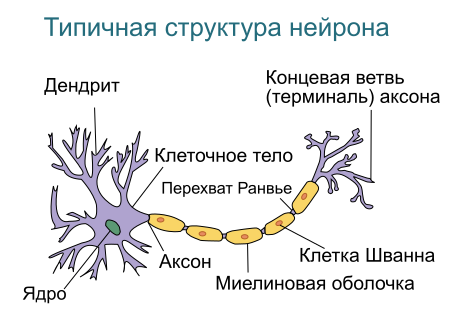  

Модель искуственного нейрона  
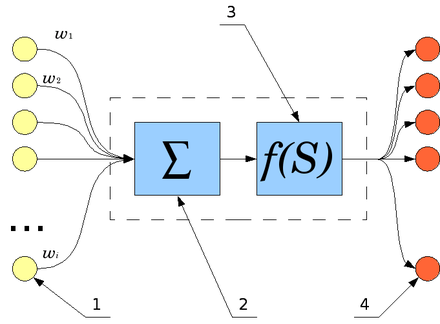

In [1]:
k, l = 1, 1
def n(a, b):
  c = k*a + l*b
  return c

n(2,3)

5

In [2]:
k, l = 0.1, 0.2
def n(a, b):
  c = k*a + l*b
  return c

n(2,3)

0.8

Математически, искуственный нейрон это просто функция от комбинации входов

### Обратное распространение ошибки

Хотим, чтобы результаты наших рассчетов как-то повлияли на сами расчеты  
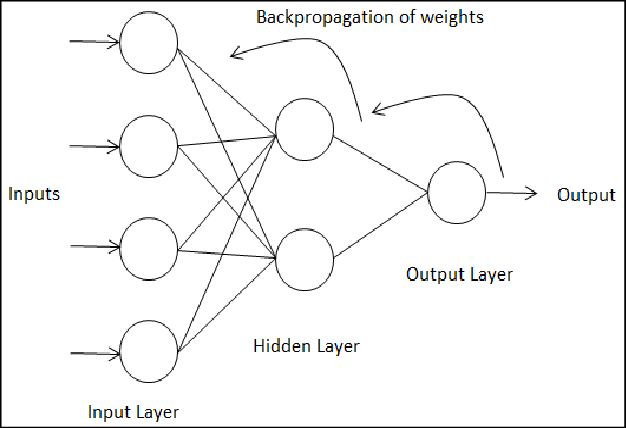

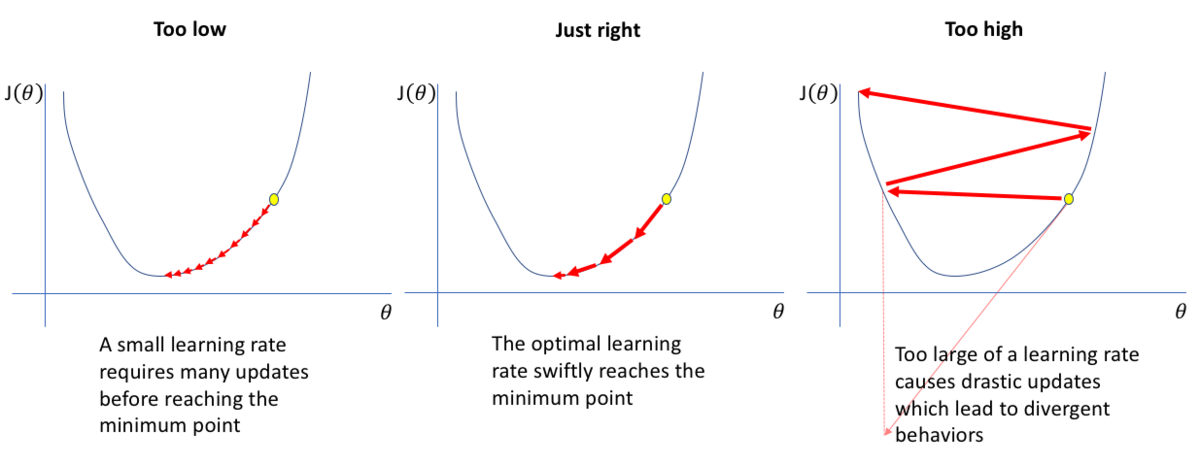

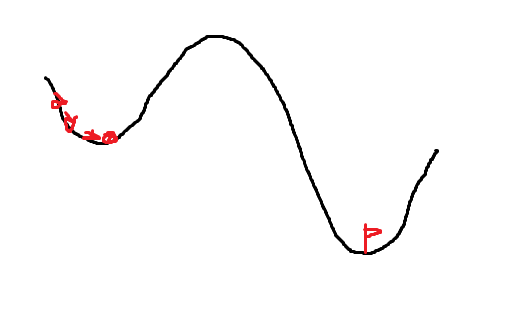

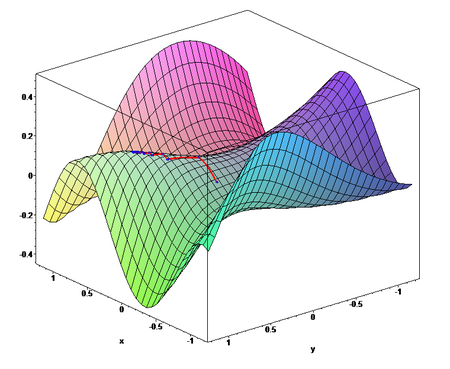

In [7]:
target = 5

def sum(a, b, weights):
  w_a, w_b = weights
  return a * w_a + b * w_b

weights = (0.1, 0.1)
a, b = 3, 2

In [8]:
sum(a, b, weights)

0.5

In [9]:
loss = target - sum(a, b, weights)

In [10]:
def change_weights(weights, loss, lr):
  w_a, w_b = weights
  return (w_a + loss*lr, w_b + loss*lr)

lr = 0.1

weights = change_weights(weights, loss, lr)
print(weights)

(0.55, 0.55)


In [11]:
sum(a, b, weights)

2.75

In [30]:
loss = target - sum(a, b, weights)
weights = change_weights(weights, loss, lr)
sum(a, b, weights)

4.999991416931152

In [32]:
epsilon = 0.0001
-epsilon <= loss <= epsilon

True

## Слои

### Linear layer

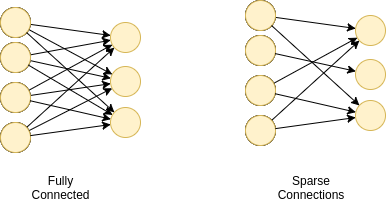

In [ ]:
#  y = k * x + b

#     d1   d2   d3
# e1  .2   .1   .7
# e2  .3   .1   .6
# e3  .5   .4   .1
# e4  .9   .0   .1

### LSTM

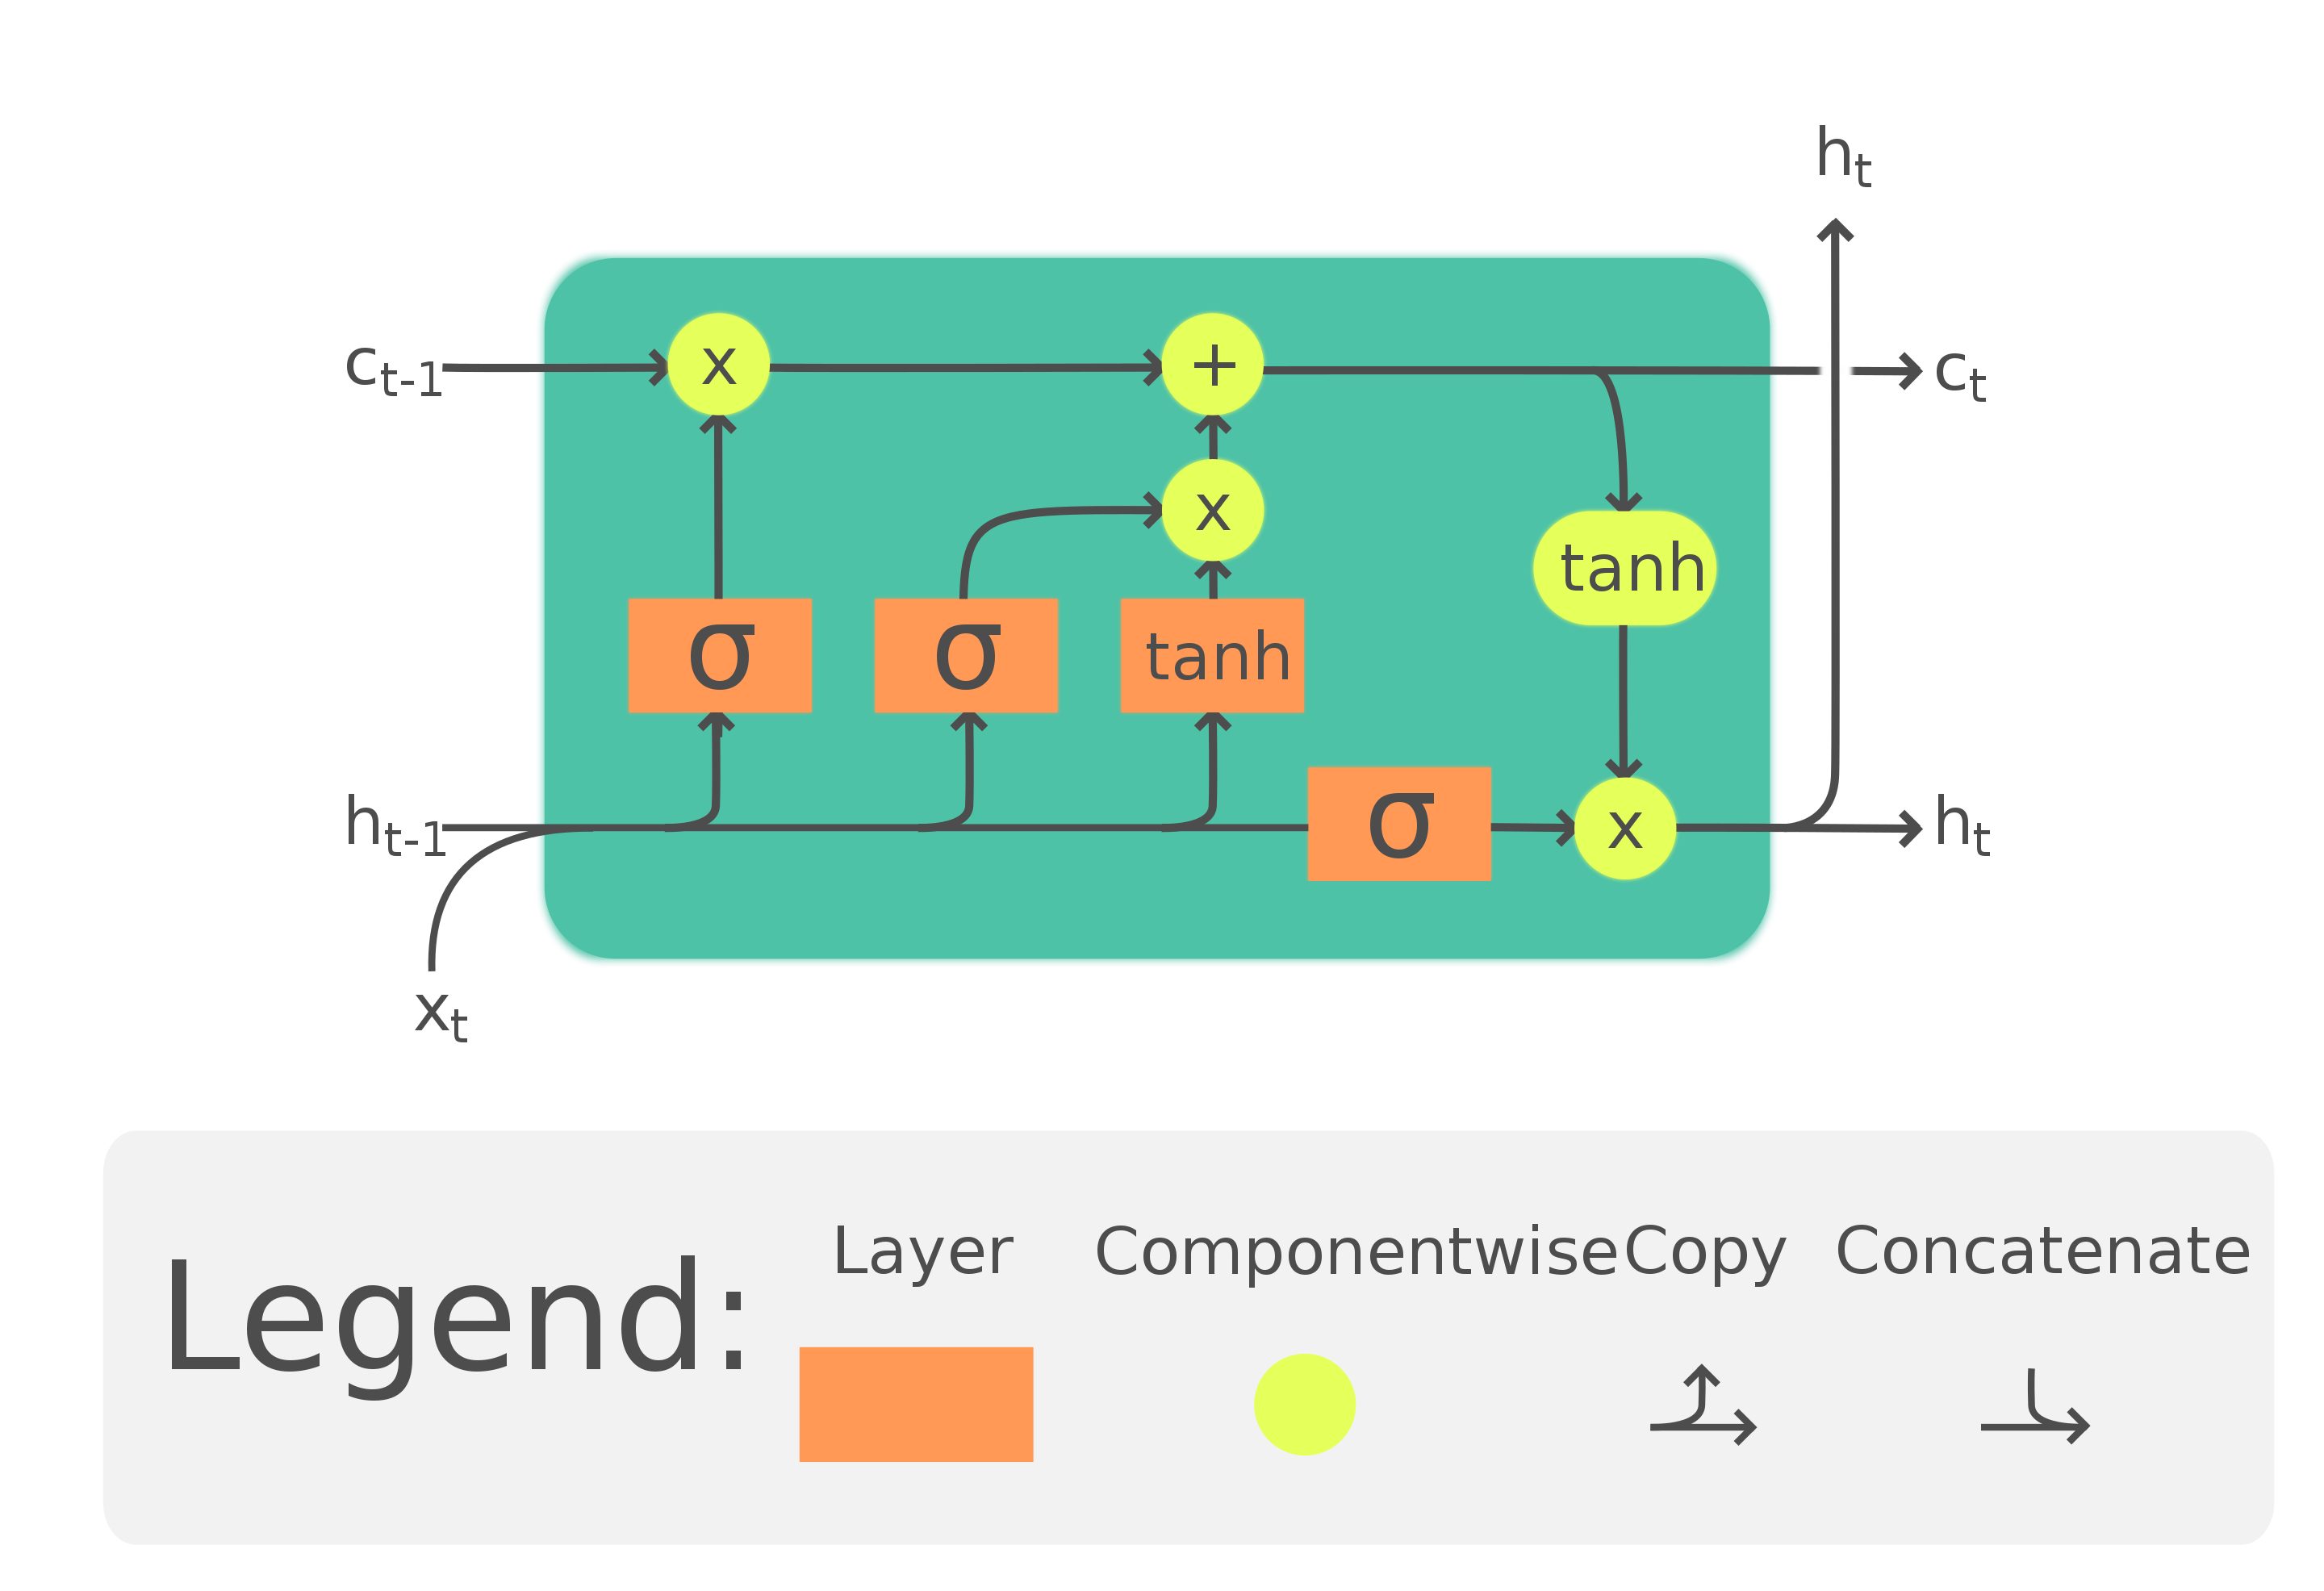

### CNN

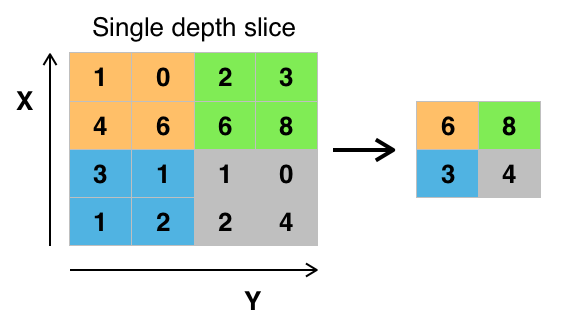

In [ ]:
# a b c d
# e f g h
# i j k l
# m n o p

# (a b e f)
# (b c f g)
# (c d g h)
# ....

# x1 x2 x3
# x4 x5 x6
# x7 x8 x9

In [ ]:
# 0 0 0 0 0 0
# 0 a b c d 0
# 0 e f g h 0
# 0 i j k l 0
# 0 m n o p 0
# 0 0 0 0 0 0

In [ ]:
# c1 -> c2 -> c3 -> c4 -> c5
#    ------------>
#          ------------>

### Activation

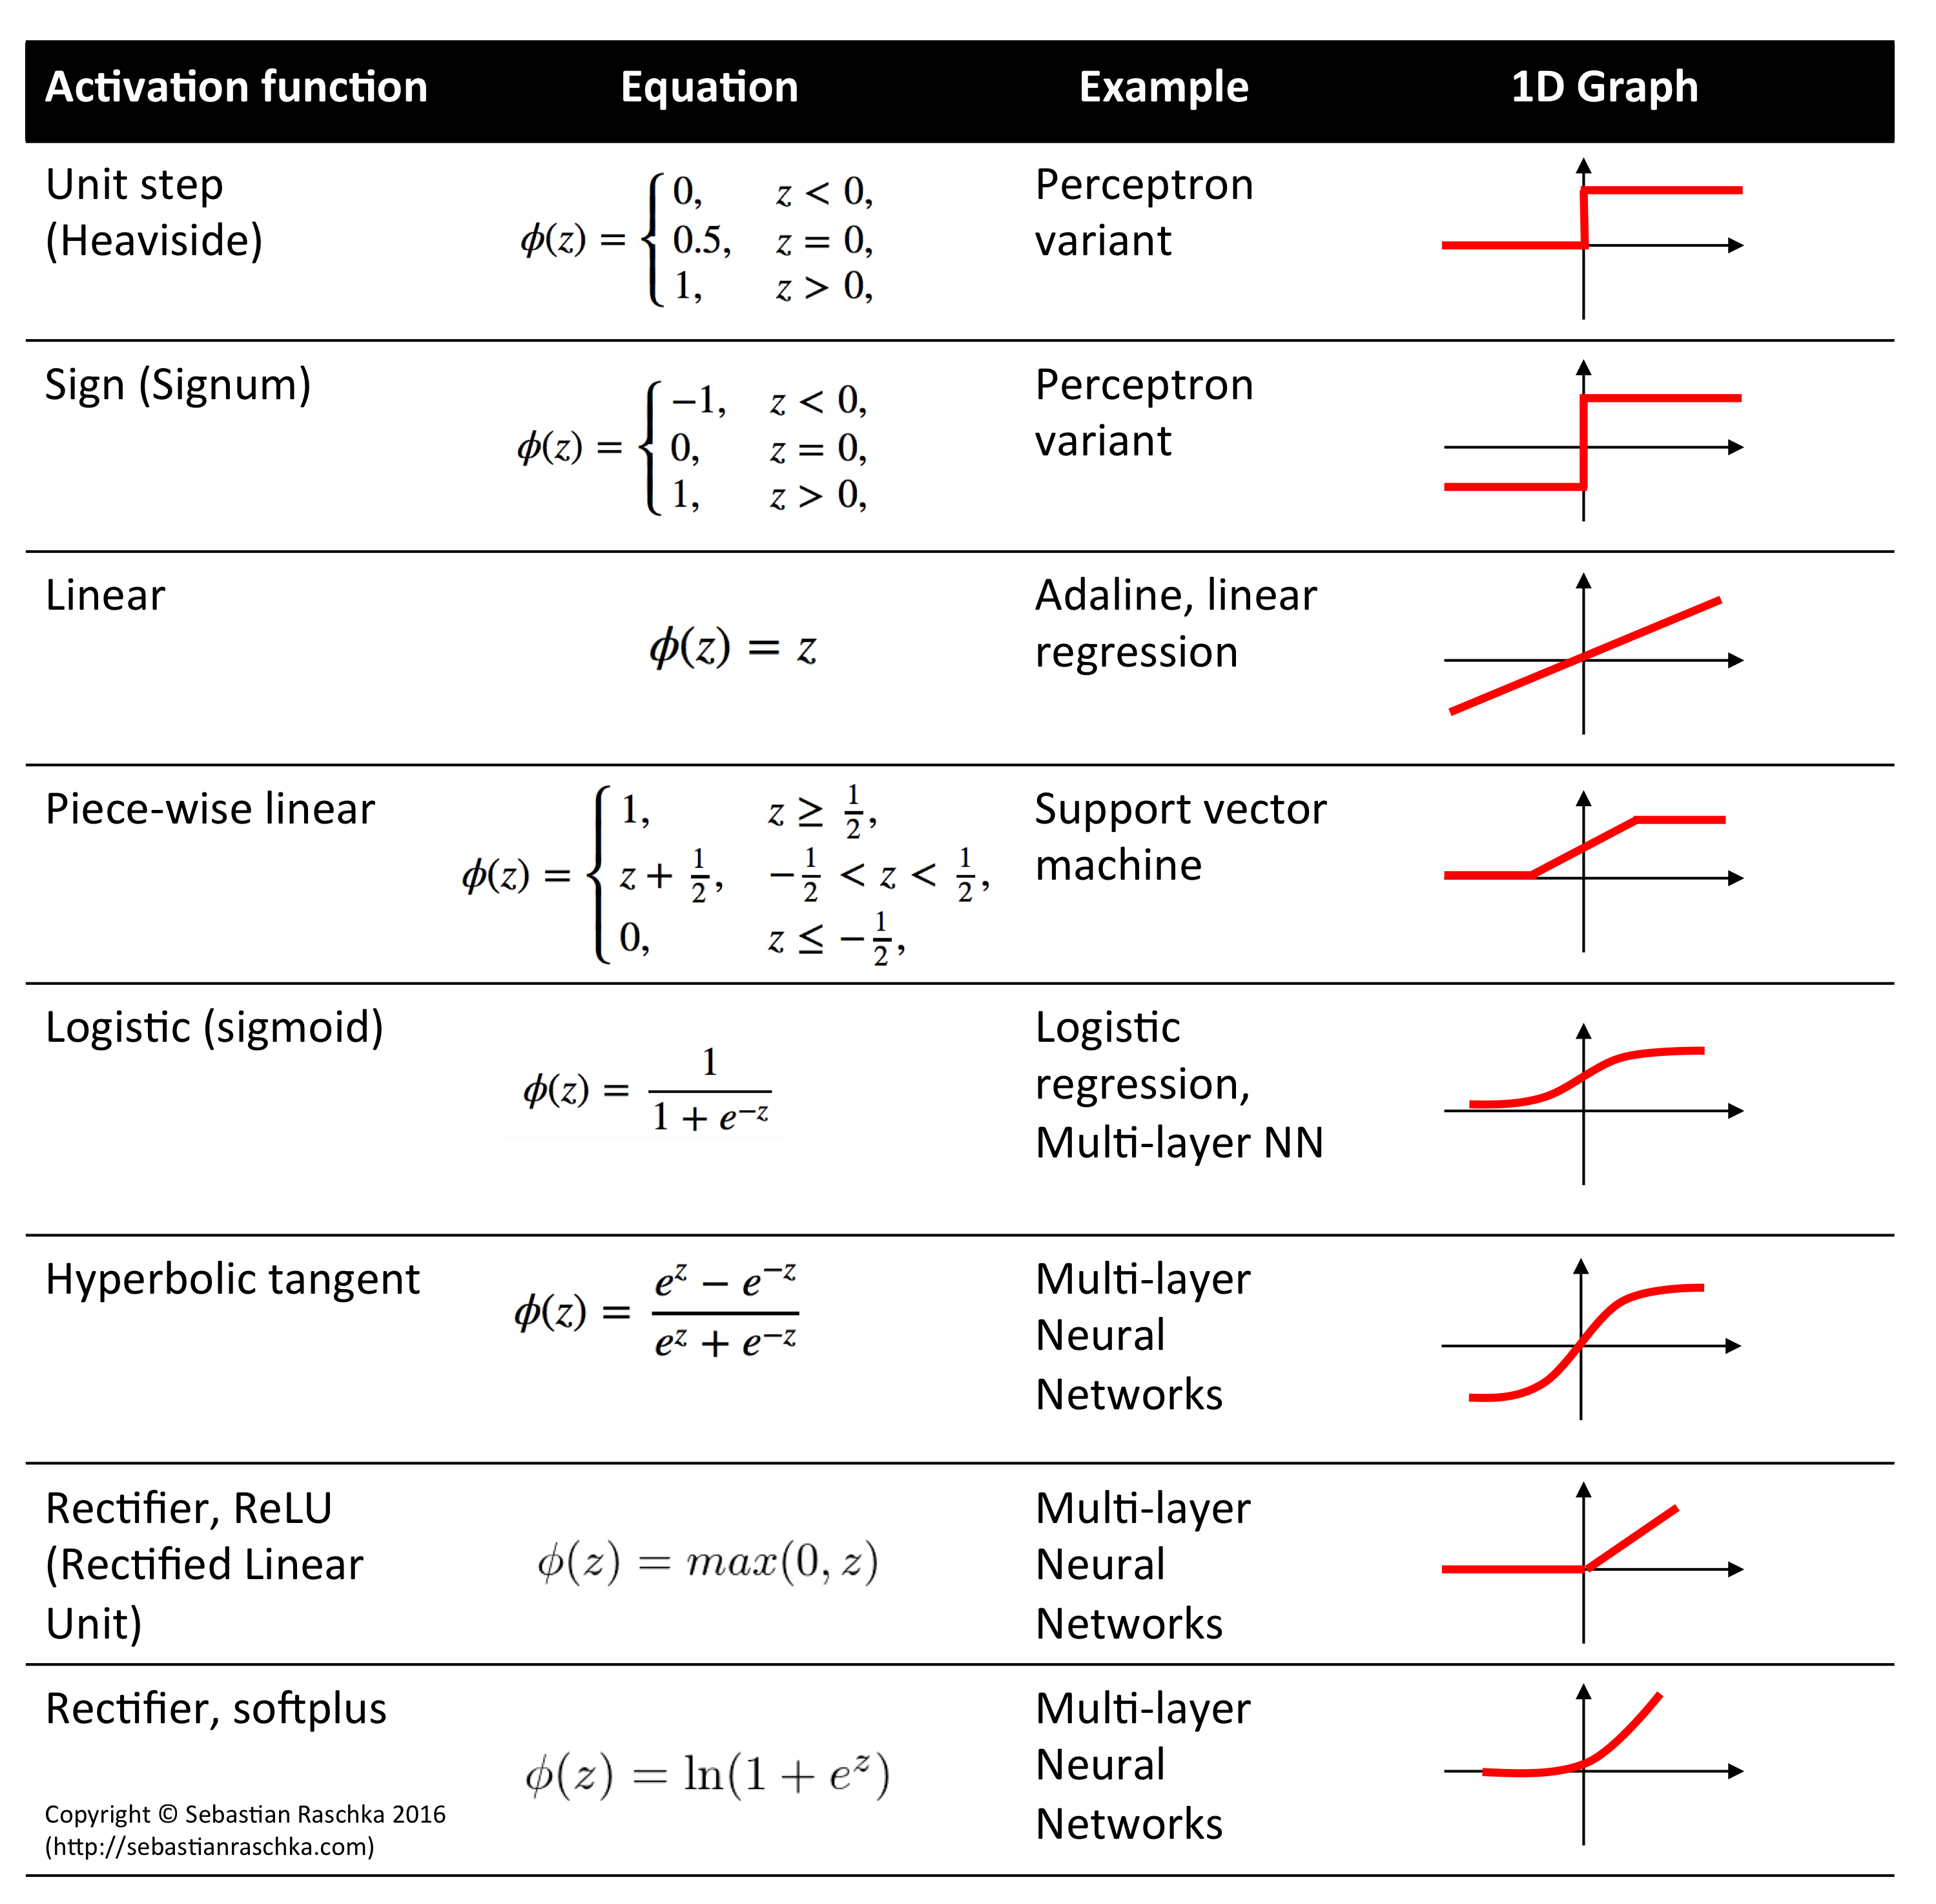

In [33]:
# png_1 = [1, 1, 1, 0, 0, 1, 0, 0, 1] -> [0.5, 0.2, 0.1, 0.1] -> [0.65] -> 1

## Методы

- supervised
- unsupervised
- reinforcement learning

https://www.gymlibrary.dev/

## Задачи

- классификация
- кластеризация
- регрессия
- обнаружение аномалий
- снижение размерности

# Практика

## Регрессия

In [34]:
import re
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data.csv')

In [35]:
data

,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image_top_1,deal_probability
0,Бытовая электроника,Телефоны,Xiaomi,NaN,NaN,Xiaomi RedMI 4a,"Телефон новый, не использованный, в заводской ...",6900.0,22,2017-03-26,Private,2944.0,0.16933
1,Транспорт,Автомобили,С пробегом,Audi,Q5,"Audi Q5, 2009",Продам автомобиль AUDI SUV Stronic Quattro 2.0...,890000.0,6,2017-03-16,Private,1132.0,0.26029
2,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,98-104 см (2-4 года),Толстовка очень теплая,"на меху, очень теплая, хорошее состояние , бол...",500.0,123,2017-03-27,Private,61.0,0.80323
3,Бытовая электроника,Телефоны,iPhone,NaN,NaN,"Продаю айфон 6 16 гб сильвер с зарядкой,без ко...","Продаю айфон 6 16 гб сильвер с зарядкой,без ко...",23000.0,7,2017-03-15,Private,2918.0,0.03486
4,Животные,Аквариум,NaN,NaN,NaN,Аквариум,Аквариум для маленьких рыбок+корм+грунт+подста...,1000.0,109,2017-03-25,Company,1718.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138710,Недвижимость,Земельные участки,Продам,Поселений (ИЖС),NaN,Участок 7 сот. (ИЖС),Продается земельный участок в поселке Совет-Кв...,1700000.0,1738,2017-03-23,Shop,1285.0,0.12205
138711,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),1111 Ока,"ВАЗ 1111 Ока, 2004",Состояние хорошее,60000.0,1,2017-03-15,Private,1055.0,0.73760
138712,Для дома и дачи,Ремонт и строительство,Инструменты,NaN,NaN,Бензопила интерскол пцб 16\40л,"на запчасти,не заводится",1000.0,9,2017-03-15,Private,1243.0,0.20123
138713,Для бизнеса,Готовый бизнес,Торговля,NaN,NaN,Свадебный салон именно для вас,Продажа готового бизнеса в преддверии свадебно...,200000.0,28,2017-03-18,Company,559.0,0.00000


In [36]:
def count_adj(x):
  res = re.match('([a-zа-я]+,)+', x.lower())
  if res is None:
    return 0
  return len(re.match('([a-zа-я]+,)+', x.lower()).group().split(','))

data['starts_ends_properly'] = data['description'].apply(lambda x: re.match('^[A-ZА-ЯЁ].*[.!?]$', x) is not None)
data['consecutive_adj_count'] = data['description'].apply(lambda x: count_adj(x))
data['long_words'] = data['description'].apply(lambda x: len(re.findall('[a-zа-я]{15,40}', x.lower())))
data['short_words'] = data['description'].apply(lambda x: len(re.findall('[a-zа-я]{2,7}', x.lower())))
data['brand_words'] = data['description'].apply(lambda x: len(re.findall('[A-ZА-ЯЁ]+', x)))

In [37]:
X = data[['starts_ends_properly', 'consecutive_adj_count', 'long_words', 'short_words', 'brand_words']].values
y = data.deal_probability.values

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.26359978859450045

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.26547500410774866

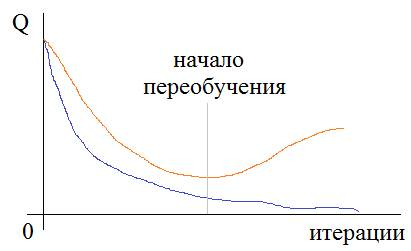

## Классификация

In [42]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz
from os import walk
import re
train_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/neg/" + f).read())
      train_negatives.append(text)
train_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/pos/" + f).read())
      train_positives.append(text)

train_data = train_negatives + train_positives

--2024-11-21 16:35:17--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  46.0MB/s    in 1.7s    

2024-11-21 16:35:18 (46.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [43]:
test_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/neg/" + f).read())
      test_negatives.append(text)
test_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/pos/" + f).read())
      test_positives.append(text)
test_data = test_negatives + test_positives

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
corpus = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document?"
]

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [49]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [ ]:
# tf = кол-во вхождений слова в тексте / кол-во слов в тексте
# idf = log(кол-во текстов / кол-во текстов, где встретилось слово)
# tf-idf = tf * idf

In [50]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
X_train_counts.shape
X_test = count_vect.transform(test_data)

In [ ]:
# 1000 people
# 995 not ill, 5 ill
# guessed 3 ill, 997 not ill (3 tp, 2 fn, 995 tn, 0 fp)

#    0   1
# 0  tn  fp
# 1  fn  fp
# ACCURACY = 998/1000 = 0.998
# PRECISION = 3/3 = 1
# RECALL = 3/5 = 0.6
# F1 = 2 * PR * REC / (PR + REC) = 0.6/1.6 = 0.38

In [53]:
class Metrics:
  def __init__(self):
    self.set_initial()
  def set_initial(self):
    self.tp = 0
    self.tn = 0
    self.fn = 0
    self.fp = 0
  def fit(self, predicted, real):
    self.set_initial()
    for i in range(len(predicted)):
      p = predicted[i]
      r = real[i]
      if p == 1:
        if p == r:
          self.tp += 1
        else:
          self.fp += 1
      else:
        if p == r:
          self.tn += 1
        else:
          self.fn += 1
  def acc(self):
    return (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)
  def prec(self):
    return self.tp/(self.tp + self.fp)
  def rec(self):
    return self.tp/(self.tp + self.fn)
  def f1(self):
    return 2 * self.prec() * self.rec() / (self.prec() + self.rec())

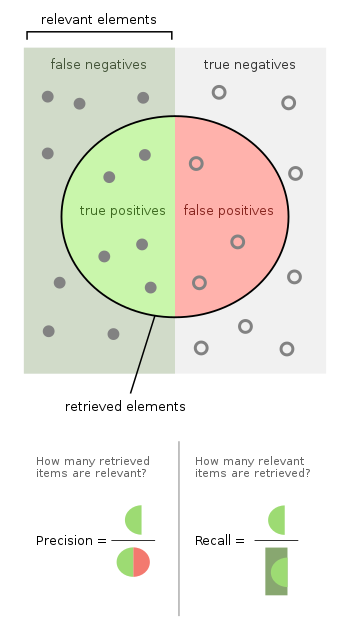

In [51]:
from sklearn.naive_bayes import MultinomialNB
classes = [0] * 12500 + [1] * 12500
multi_clf = MultinomialNB().fit(X_train_counts, classes)
multi_predicted = multi_clf.predict(X_test)
multi_predicted_proba = multi_clf.predict_proba(X_test)

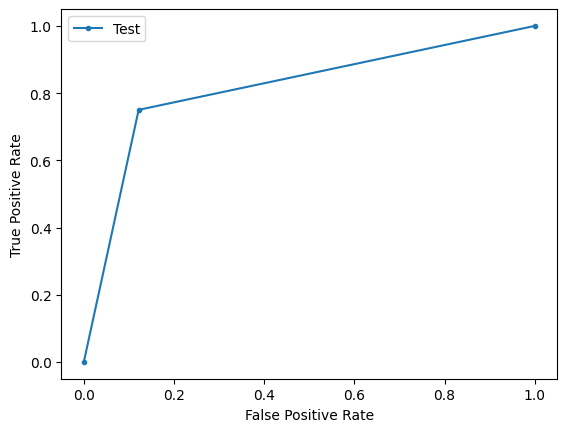

acc: 0.81432
True
f1: 0.8016069749551243
False
p: 0.8605248669480638
True
r: 0.75024
True
roc auc score: 0.8143199999999999


In [54]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
m = Metrics()
m.fit(multi_predicted, classes)
acc = accuracy_score(classes, multi_predicted)
f1 = f1_score(classes, multi_predicted)
p = precision_score(classes, multi_predicted)
r = recall_score(classes, multi_predicted)

fpr, tpr, _ = roc_curve(classes, multi_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, multi_predicted)))

In [55]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression().fit(X_train_counts, classes)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
lr_predicted = lr_clf.predict(X_test)
lr_predicted_proba = lr_clf.predict_proba(X_test)

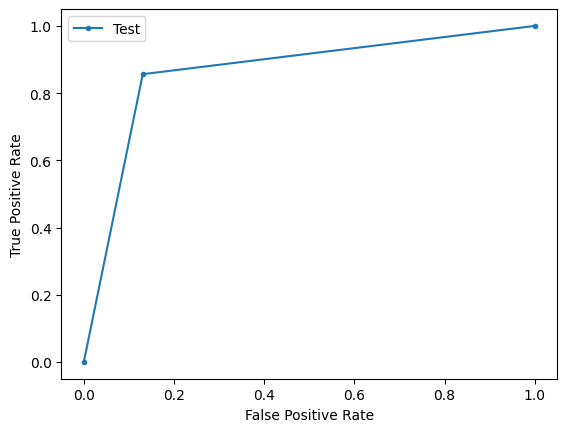

acc: 0.86284
True
f1: 0.8619509642095092
True
p: 0.8675743577275306
True
r: 0.8564
True
roc auc score: 0.86284


In [57]:
m = Metrics()
m.fit(lr_predicted, classes)
acc = accuracy_score(classes, lr_predicted)
f1 = f1_score(classes, lr_predicted)
p = precision_score(classes, lr_predicted)
r = recall_score(classes, lr_predicted)

fpr, tpr, _ = roc_curve(classes, lr_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, lr_predicted)))

## Еще классификация

In [58]:
from sklearn.datasets import fetch_20newsgroups
cts = ['comp.graphics', 'comp.sys.mac.hardware', 'sci.crypt', 'sci.space']
train_data = [fetch_20newsgroups(subset='train', categories=[c]) for c in cts]
test_data = [fetch_20newsgroups(subset='test', categories=[c]) for c in cts]

In [59]:
all_train_data = []
for d in train_data:
  all_train_data += d.data

all_test_data = []
for d in test_data:
  all_test_data += d.data

In [60]:
train_classes = []
for i in range(len(train_data)):
  train_classes += len(train_data[i].data) * [i]

test_classes = []
for i in range(len(test_data)):
  test_classes += len(test_data[i].data) * [i]

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=3, max_df=0.4, max_features=1000)
X_train = cv.fit_transform(all_train_data)
X_test = cv.transform(all_test_data)

In [66]:
from sklearn.model_selection import GridSearchCV
def grid_search_best(model, grid, folds, grid_train_data, grid_train_classes):
  grid_search = GridSearchCV(model, param_grid=grid, cv=folds, scoring='f1_macro')
  grid_search.fit(grid_train_data, grid_train_classes)
  return grid_search.best_score_, grid_search.best_params_, grid_search.best_estimator_

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

n_fold = 10
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

models = [MultinomialNB(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]
grids = [
{
    'alpha': [0.1, 0.5, 1, 1.5, 2],
    'fit_prior': [True, False]
},{
    'max_features': [50,100,150],
    'random_state': [42]
},{
    'n_estimators': [50,100,150],
    'max_features': [50,100,150],
    'random_state': [42]
}]

def find_models(find_models, find_grids, find_folds, find_train, find_classes):
  best_models = []
  train_scores = []
  for i in range(len(find_models)):
    score, params, estimator = grid_search_best(find_models[i], find_grids[i], find_folds, find_train.toarray(), find_classes)
    print('Best score: {}'.format(score))
    print('Best parameters: {}'.format(params))
    train_scores.append(score)
    best_models.append(estimator)
  return best_models, train_scores

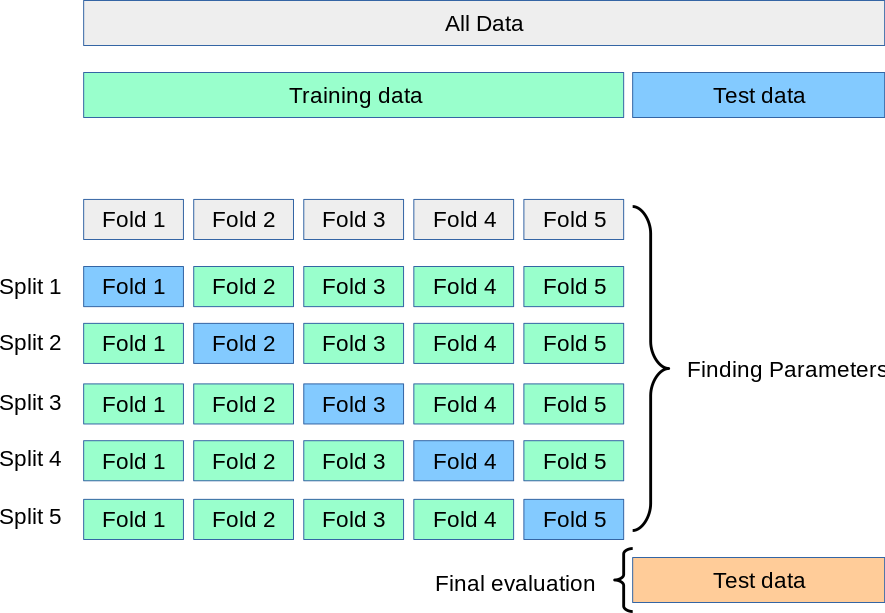

In [67]:
best_models, train_scores = find_models(models, grids, stratified_folds, X_train, train_classes)

Best score: 0.9281548387571845
Best parameters: {'alpha': 0.1, 'fit_prior': False}
Best score: 0.8257408026957942
Best parameters: {'max_features': 150, 'random_state': 42}
Best score: 0.9201980092931639
Best parameters: {'max_features': 50, 'n_estimators': 150, 'random_state': 42}


## Кластеризация

In [68]:
data = pd.read_csv('data.csv')
data = data[['category_name', 'title']]
sample = data.sample(frac=0.01)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import Birch

from tqdm import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
data[:5]

,category_name,title
0,Телефоны,Xiaomi RedMI 4a
1,Автомобили,"Audi Q5, 2009"
2,Детская одежда и обувь,Толстовка очень теплая
3,Телефоны,"Продаю айфон 6 16 гб сильвер с зарядкой,без ко..."
4,Аквариум,Аквариум


 68%|██████▊   | 34/50 [00:05<00:02,  6.80it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (336) by BIRCH is less than (345). Decrease the threshold.
  warnings.warn(
 70%|███████   | 35/50 [00:05<00:02,  7.06it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (336) by BIRCH is less than (355). Decrease the threshold.
  warnings.warn(
 72%|███████▏  | 36/50 [00:05<00:01,  7.20it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (336) by BIRCH is less than (365). Decrease the threshold.
  warnings.warn(
 74%|███████▍  | 37/50 [00:05<00:01,  7.41it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (336) by BIRCH is less than (375). Decrease the threshold.
  warnings.warn(
 76%|███████▌  | 38/50 [00:05<00

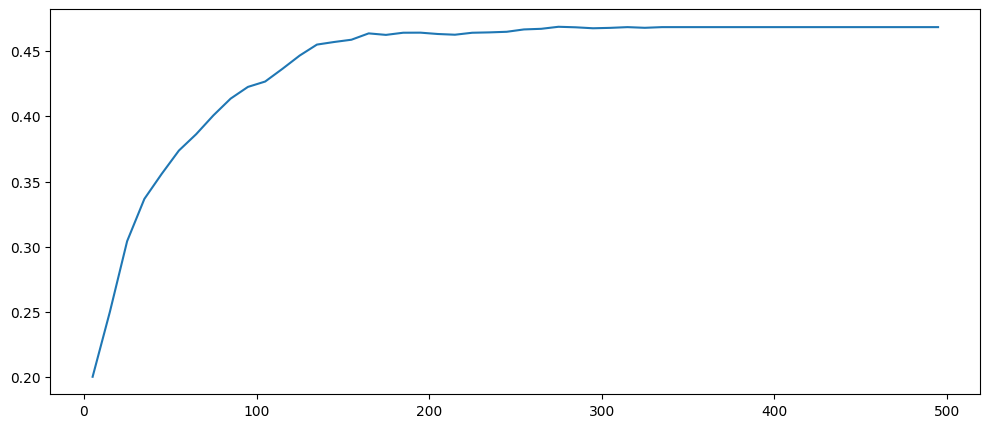

In [70]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=250)
X = vectorizer.fit_transform(sample['title'])
y = sample['category_name']

scores = []
for i in tqdm(range(5, 500, 10)):
    cluster = Birch(n_clusters=i)
    cluster.fit(X)
    scores.append(metrics.v_measure_score(y, cluster.labels_))
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 500, 10)), scores)

In [71]:
best_Birch = None
best_Birch_score = 0
for threshold in [0.3, 0.5, 0.7]:
  for branching_factor in [15, 30, 45, 60]:
    model = Birch(n_clusters=200, threshold=threshold, branching_factor=branching_factor)
    model.fit(X)
    labels = model.labels_
    v_mes_score = metrics.v_measure_score(y, labels)
    if v_mes_score > best_Birch_score:
      best_Birch_score = v_mes_score
      best_Birch = model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (144) by BIRCH is less than (200). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (156) by BIRCH is less than (200). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (150) by BIRCH is less than (200). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (126) by BIRCH is less than (200). Decrease the threshold.
  warnings.warn(


In [72]:
print(best_Birch, best_Birch_score)

Birch(branching_factor=15, n_clusters=200) 0.4718086008113892


Сколько кластеров? Метод локтя в помощь

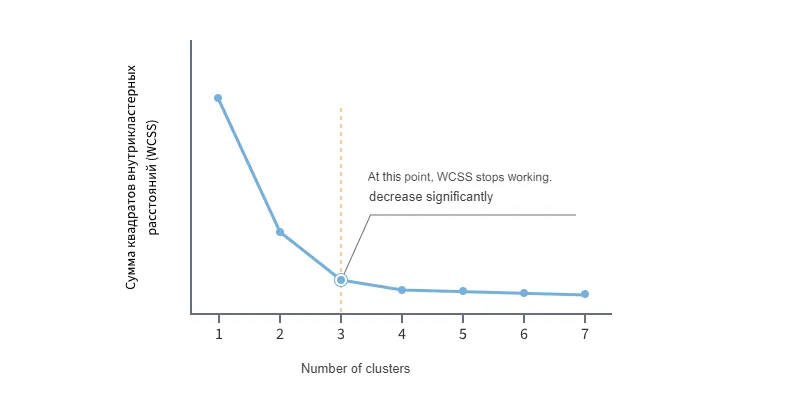

## NER

In [73]:
!wget https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/pristavki.csv

--2024-11-21 17:07:33--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/pristavki.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2939556 (2.8M) [text/plain]
Saving to: ‘pristavki.csv’

pristavki.csv       100%[===================>]   2.80M  --.-KB/s    in 0.05s   

2024-11-21 17:07:34 (55.1 MB/s) - ‘pristavki.csv’ saved [2939556/2939556]



In [74]:
data = pd.read_csv('pristavki.csv', header=None, names=['text'])

In [75]:
data[:5]

,text
0,Состояние: Отличное для возраста приставки./\n...
1,"+5 игар фифа15,16 мартол комбат 9, гта5,асасси..."
2,"Продам в отличном состоянии , в комплекте пров..."
3,"Продам PS3, 2 беспроводных джойстика в комплек..."
4,Продаю в связи с ненадобностью.Купила для мужа...


In [76]:
!pip install yargy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 89.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=54f711b91275e3226f274e2c31564203ec2f9101b9479bb8f127ff047e0dbd95
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [77]:
from yargy import Parser, rule, or_
from yargy.predicates import in_, in_caseless
from yargy.tokenizer import MorphTokenizer
from yargy.pipelines import morph_pipeline, caseless_pipeline
from yargy.interpretation import fact
from IPython.display import display

In [78]:
Game = fact(
    'Game',
    ['title', 'subtitle', 'series_number']
)

In [79]:
CoD_subtitles = {
    'MW': 'Modern Warfare',
    'Modern Warfare': 'Modern Warfare',
    'Black Ops': 'Black Ops',
    'Infinite Warfare': 'Infinite Warfare',
    'Advanced Warfare': 'Advanced Warfare',
    'World at War': 'World at War',
    'Ghosts': 'Ghosts'
}

CoD_series_numbers = {
    'III': '3',
    '1': '1',
    '2': '2',
    '3': '3',
}

CoD = rule(
    morph_pipeline(['Call of Duty']).interpretation(Game.title.const('Call of Duty:')),
    morph_pipeline(['Black Ops', 'Infinite Warfare', 'Advanced Warfare', 'Modern Warfare', 'MW', 'World at War', 'Ghosts']).interpretation(Game.subtitle.custom(CoD_subtitles.get)).optional(),
    morph_pipeline(['1', '2', '3', 'III']).interpretation(Game.series_number.custom(CoD_series_numbers.get)).optional(),
)

In [80]:
Fifa = rule(
    morph_pipeline(['Fifa', 'фифа']).interpretation(Game.title.const('FIFA')),
    morph_pipeline(['16', '11', '15', '2004']).interpretation(Game.series_number).optional(),
)

In [81]:
GAME = or_(CoD,Fifa).interpretation(Game)

parser = Parser(GAME)

In [82]:
matches = []

for sent in data.text:
    for match in parser.findall(sent):
        matches.append(match.fact)

In [83]:
matches[:5]

[Game(
     title='FIFA',
     subtitle=None,
     series_number='15'
 ),
 Game(
     title='FIFA',
     subtitle=None,
     series_number='16'
 ),
 Game(
     title='FIFA',
     subtitle=None,
     series_number=None
 ),
 Game(
     title='Call of Duty:',
     subtitle='Ghosts',
     series_number=None
 ),
 Game(
     title='Call of Duty:',
     subtitle=None,
     series_number=None
 )]

https://github.com/yandex/tomita-parser/tree/master/docs/ru

In [ ]:
https://github.com/mannefedov/compling_nlp_hse_course

In [ ]:
https://github.com/BobaZooba/from-numpy-import-Neural-Network/blob/main/Homework%20Easy.ipynb (https://github.com/BobaZooba/DeepNLP?tab=readme-ov-file)